This is a study on Authenticwathes.com (https://www.authenticwatches.com/rolex.html). The data is webscrapped from its Rolex section and the purpose is to see how much discount on average authenticwatches is giving on its Rolex inventory, which shows how in demand is the brand and whether the brand has been diluted due to discount online, to see what are the most popular/in demand watches and what are the least in demand watches in order to further analyze what has been done right and what has been done wrong, and to approximate lost profit margin for authorized retailer every watch being sold online.

# Rolex On AuthenticWatches.com

<p><a name="DS"></a></p>
### Online watch market business model:

- Watches can usually be purchased from an AD (authorized dealer) or a boutique store (operated by the brand/manufacturer itself (5th ave))

- Online "grey" watch market like AW can sell at lower prices mainly for three reason:
    1. AD can't sell all the models so they sell in bundles to AW at a discount 
    2. Manufacturer over-produced so they sell at a discount to AW
    3. Difference in exchange rate

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
plt.style.use('ggplot')
import seaborn as sns

In [49]:
#read data
df = pd.read_csv("watches.csv")

In [50]:
df.head()

,availability,condition,image,item_number,price,product,retail_price,warranty
0,Usually ships within 6 months,Store Display Model,https://sep.yimg.com/ay/movadobaby/rolex-deepsea-126660-40.jpg,126660-BLK,"$15,500.00",Rolex Deepsea 126660,NaN,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
1,Usually ships within 4 weeks,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-yacht-master-169628-324.jpg,169628-GRY,"$21,150.00",Rolex Yacht-Master 29 169628,"$23,500.00","6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
2,Usually ships within 6 months,Store Display Model,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-yacht-master-16623-291.jpg,16623-BLU,"$11,700.00",Rolex Yacht-Master 40 16623,"$12,600.00","6 Years (Included),Silver: + 3 Years $95 Sale(+75),Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
3,Usually ships within 6 months,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-gmt-master-ii-126710-22.jpg,126710BLRO,"$24,995.00",Rolex GMT-Master II 126710BLRO,NaN,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
4,Usually ships within 4 weeks,New - Never Worn,https://s.yimg.com/aah/movadobaby/rolex-gmt-master-ii-116719blro-31.jpg,116719BLRO,"$34,995.00",Rolex GMT-Master II 116719BLRO,"$36,750.00","6 Years (Included),Silver: + 3 Years $95 Sale(+49), Gold:Lifetime $295 Best Value(+150),Platinum:Lifetime w/Ultrasonic $395 SALE(+225)"


In [51]:
df.shape

(2843, 8)

Number of unique watches (excluding color difference)

In [52]:
df["product"].nunique()

838

In [53]:
df=df[df["product"].str.contains('Link')==False] #remove watch link from the dataset
df=df[df["product"].str.contains('Strap')==False] #remove watch strap from the dataset

In [54]:
df.shape #removed 8 observations

(2835, 8)

In [55]:
df['product'].value_counts().head(20)

Rolex Datejust 36 116203         71
Rolex Datejust 36 116233         70
Rolex Lady-Datejust 26 179173    69
Rolex Datejust 36 116234         67
Rolex Lady-Datejust 26 179163    64
Rolex Day-Date 36 118238         52
Rolex Datejust 36 116200         51
Rolex Day-Date 36 118208         49
Rolex Lady-Datejust 26 179174    49
Rolex Datejust 31 178384         46
Rolex Datejust 36 116244         44
Rolex Datejust 36 116243         43
Rolex Datejust 31 178344         42
Rolex Day-Date 36 118388         41
Rolex Datejust 36 116201         40
Rolex Lady-Datejust 26 179179    40
Rolex Day-Date 36 118239         38
Rolex Lady-Datejust 26 179171    36
Rolex Datejust 36 116231         35
Rolex Day-Date 36 118389         31
Name: product, dtype: int64

In [56]:
df["price"]=df["price"].str.replace(",","") # remove commas
df["price"]=df["price"].str.replace("$","") #remove dollar sign to convert string to float
df["price"]=df["price"].astype(float)

In [57]:
df["retail_price"]=df["retail_price"].str.replace(",","") # remove commas
df["retail_price"]=df["retail_price"].str.replace("$","") #remove dollar sign to convert string to float
df["retail_price"]=df["retail_price"].astype(float)

In [58]:
df.describe()

,price,retail_price
count,2835.000000,2748.000000
mean,20190.699824,22343.950146
std,16514.962186,17945.998873
min,4095.000000,4850.000000
25%,9275.000000,9900.000000
50%,12950.000000,14250.000000
75%,29295.000000,32937.500000
max,250000.000000,277850.000000


(array([2.099e+03, 6.190e+02, 1.000e+02, 9.000e+00, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  4095. ,  28685.5,  53276. ,  77866.5, 102457. , 127047.5,
        151638. , 176228.5, 200819. , 225409.5, 250000. ]),
 <a list of 10 Patch objects>)

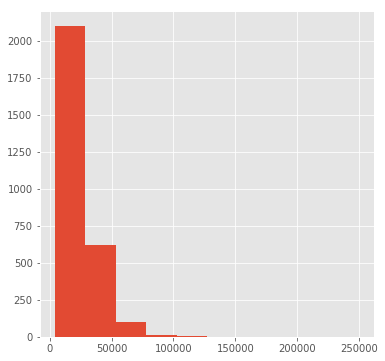

In [59]:
plt.rcParams["figure.figsize"]=6,6
plt.hist(df.price)

In [60]:
rolexprice=df.price.loc[df.price.map(lambda x: np.abs(x - df.price.mean()) / df.price.std() < 3)]

In [322]:
#rolexretailprice=df.retail_price.loc[df.retail_price.map(lambda x: np.abs(x - df.retail_price.mean()) / df.retail_price.std() < 3)]

In [61]:
rolexprice.shape #34 observations removed

(2801,)

(array([1057.,  677.,  137.,  287.,  321.,  105.,   84.,   70.,   44.,
          19.]),
 array([ 4095. , 10580.5, 17066. , 23551.5, 30037. , 36522.5, 43008. ,
        49493.5, 55979. , 62464.5, 68950. ]),
 <a list of 10 Patch objects>)

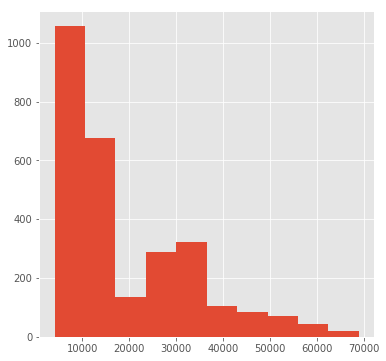

In [62]:
plt.rcParams["figure.figsize"]=6,6
plt.hist(rolexprice)
#density plot

(array([1090.,  585.,  116.,  280.,  320.,  108.,   83.,   69.,   46.,
          20.]),
 array([ 4850., 11965., 19080., 26195., 33310., 40425., 47540., 54655.,
        61770., 68885., 76000.]),
 <a list of 10 Patch objects>)

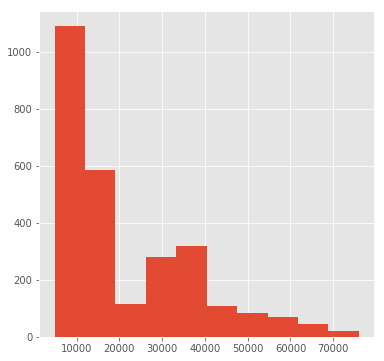

In [323]:
plt.rcParams["figure.figsize"]=6,6
plt.hist(rolexretailprice)
#density plot

In [63]:
pd.set_option('display.max_colwidth', -1) #show full rows because html output is truncated


In [64]:
df.loc[df.price==df.price.max()].image

172    https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-day-date-special-edition-18956-48.jpg
Name: image, dtype: object

In [65]:
df.loc[df.price==df.price.min()].image

772    https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-176200-280.jpg
Name: image, dtype: object

### The most expensive listed: Rolex Oyster Perpetual Day Date Special Edition, $......
<img src=" https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-day-date-special-edition-18956-48.jpg" style="width: 250px;">

### The cheapest listed: Rolex Oyster Perpetual 
<img src=" https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-176200-280.jpg" alt="drawing" style="width: 250px;">

### 87 Watches online do not have retail price listed, why?

In [357]:
df["retail_price"].isna().sum()

87

In [359]:
noretailprice=df[df["retail_price"].isna()]

In [360]:
noretailprice

,availability,condition,image,item_number,price,product,retail_price,warranty
0,Usually ships within 6 months,Store Display Model,https://sep.yimg.com/ay/movadobaby/rolex-deepsea-126660-40.jpg,126660-BLK,15500.0,Rolex Deepsea 126660,NaN,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
3,Usually ships within 6 months,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-gmt-master-ii-126710-22.jpg,126710BLRO,24995.0,Rolex GMT-Master II 126710BLRO,NaN,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
5,Usually ships within 6 months,Store Display Model,NaN,16613-BLU,11000.0,Rolex Submariner Date 16613,NaN,"6 Years (Included),Silver: + 3 Years $95 Sale(+75),Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
18,Usually ships within 6 months,Store Display Model,https://sep.yimg.com/ay/movadobaby/rolex-explorer-ii-16570-51.jpg,16570-BLACK,6775.0,Rolex Explorer II 16570,NaN,"6 Years (Included),Silver: + 3 Years $95 Sale(+75),Gold:Lifetime $295 Sale (+250),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
19,Usually ships within 6 months,Store Display Model,https://sep.yimg.com/ay/movadobaby/rolex-explorer-ii-16570-44.jpg,16570-WHITE,6775.0,Rolex Explorer II 16570,NaN,"6 Years (Included),Silver: + 3 Years $95 Sale(+75),Gold:Lifetime $295 Sale (+250),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
23,Usually ships within 6 months,Store Display Model,https://sep.yimg.com/ay/movadobaby/rolex-cellini-cellinium-5240-6-20.jpg,5240-6,16000.0,Rolex Cellini Cellinium 5240/6,NaN,"6 Years (Included),Silver: + 3 Years $95 Sale(+75),Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
24,Usually ships within 6 months,Store Display Model,https://sep.yimg.com/ay/movadobaby/rolex-cellini-cellinium-5241-6-20.jpg,5241-6,16500.0,Rolex Cellini Cellinium 5241/6,NaN,"6 Years (Included),Silver: + 3 Years $95 Sale(+75),Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
32,Usually ships within 3 months,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-datejust-36-126281rbr-3.jpg,126281RBR-DRHORDJ,20900.0,Rolex Datejust 36 126281RBR,NaN,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
33,Usually ships within 3 months,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-datejust-36-126233-3.jpg,126233-CHPDO,12550.0,ROLEX DATEJUST 36 126233,NaN,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
396,Usually ships within 6 months,Store Display Model,https://sep.yimg.com/ay/movadobaby/rolex-submariner-14060m-18.jpg,14060M,7775.0,Rolex Submariner 14060M,NaN,"6 Years (Included),Silver: + 3 Years $95 Sale(+75),Gold:Lifetime $295 Sale (+250),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"


### Perfect relationship between retail and online price

C:\Users\samuelmao\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samuelmao\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


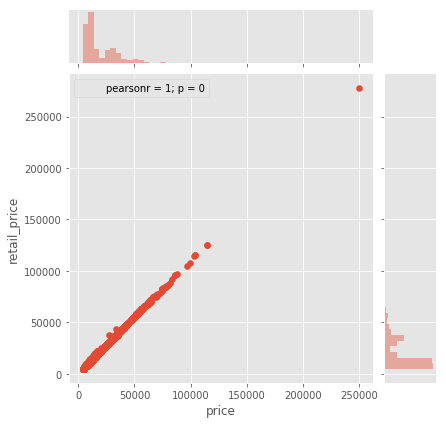

In [66]:
sns.jointplot(df["price"], df["retail_price"])

### Online Rolex watches are cheaper, but not by much

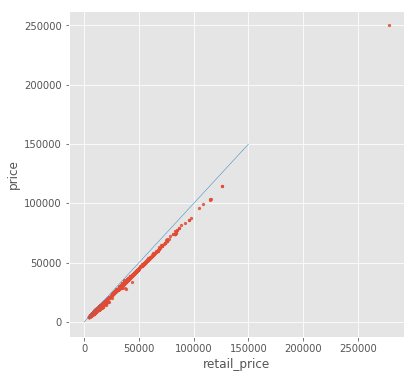

In [67]:
sns.regplot(x="retail_price",y="price",data=df,fit_reg=False,scatter_kws={'s':5})
plt.plot([0, 150000], [0, 150000], linewidth=0.5)

(0, 150000)

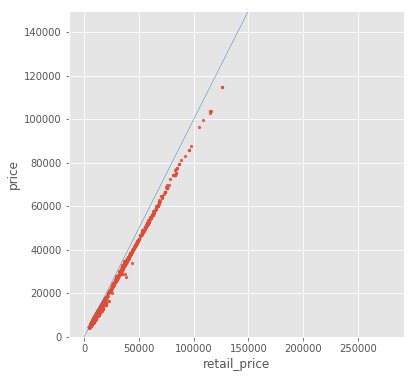

In [68]:
sns.regplot(x="retail_price",y="price",data=df,fit_reg=False,scatter_kws={'s':5})
plt.plot([0, 150000], [0, 150000], linewidth=0.5)
plt.ylim(0, 150000) #hide the most expensive  $250,000 watch from graph

In [69]:
dat1=df.loc[df.retail_price.isnull()==False,:] #remove products that don't have retail price listed

In [70]:
merged=pd.merge(df, dat1, how='inner', on =['product','item_number','price','retail_price','availability','condition','warranty','image'])

In [71]:
merged.head()

,availability,condition,image,item_number,price,product,retail_price,warranty
0,Usually ships within 4 weeks,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-yacht-master-169628-324.jpg,169628-GRY,21150.0,Rolex Yacht-Master 29 169628,23500.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
1,Usually ships within 6 months,Store Display Model,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-yacht-master-16623-291.jpg,16623-BLU,11700.0,Rolex Yacht-Master 40 16623,12600.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75),Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"
2,Usually ships within 4 weeks,New - Never Worn,https://s.yimg.com/aah/movadobaby/rolex-gmt-master-ii-116719blro-31.jpg,116719BLRO,34995.0,Rolex GMT-Master II 116719BLRO,36750.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+49), Gold:Lifetime $295 Best Value(+150),Platinum:Lifetime w/Ultrasonic $395 SALE(+225)"
3,Usually ships within 3 months,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-116034-313.jpg,116034-BLKOAO,6295.0,Rolex Oyster Perpetual 36 116034,6650.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+50), Gold:Lifetime $295 Best Value(+150),Platinum:Lifetime w/Ultrasonic $395 Sale(+225)"
4,IN STOCK,Store Display Model,https://sep.yimg.com/ay/movadobaby/rolex-lady-datejust-28-279173-618.jpg,279173-SLVDJ,9475.0,Rolex Lady-Datejust 28 Women's Watch 279173,11100.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)"


### In general, online Rolex watches are 10% cheaper

In [605]:
import statsmodels.api as sm

X = merged.retail_price
y = merged.price

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.319e+06
Date:                Sat, 04 Aug 2018   Prob (F-statistic):               0.00
Time:                        22:32:32   Log-Likelihood:                -20813.
No. Observations:                2748   AIC:                         4.163e+04
Df Residuals:                    2747   BIC:                         4.163e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
retail_price     0.9045      0.000   2884.248      0.000       0.904       0.905
==============================================================================
Omnibus:                     2581.893   Durbin-Watson:                   0.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           211573.946
Skew:                          -4.211   Prob(JB):                         0.00
Kurtosis:                      45.153   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

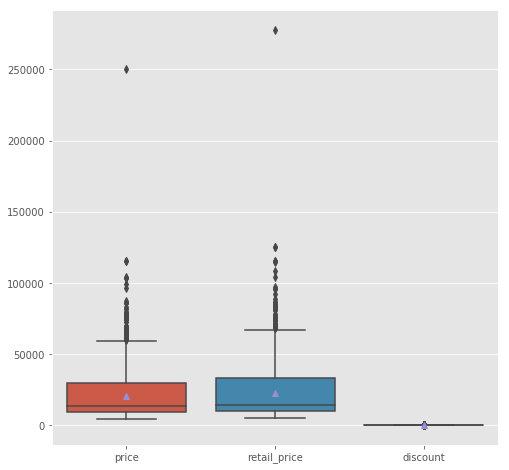

In [591]:
sns.boxplot(data=merged,showmeans=True)

(0, 150000)

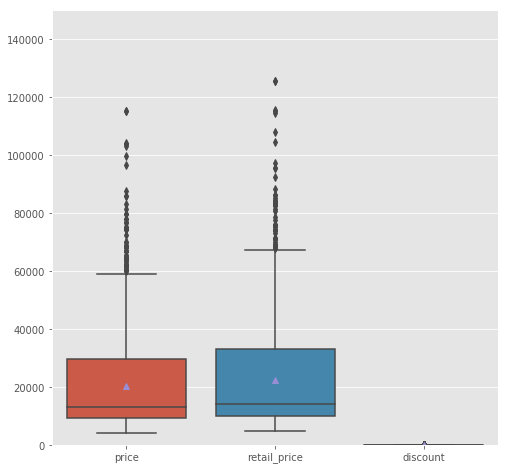

In [592]:
sns.boxplot(data=merged,showmeans=True)
plt.ylim(0, 150000)

In [95]:
merged['discount']=merged['price']/merged['retail_price'] #create discount percentage

In [362]:
merged.sort_values('discount')[:4]

,availability,condition,image,item_number,price,product,retail_price,warranty,discount
695,IN STOCK,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-lady-datejust-28-279138rbr-360.jpg,279138RBR-LILRDP,27500.0,Rolex Lady-Datejust 28 Lilac Dial Women's Watch 279138RBR,38000.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)",0.723684
722,IN STOCK,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-datejust-116243-1022.jpg,116243-BMOPDJ,16550.0,Rolex Datejust 36 Women's Watch 116243,22550.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)",0.733925
713,IN STOCK,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-datejust-36-116201-337.jpg,116201-CHODJ,9995.0,Rolex Datejust 36 116201,13600.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)",0.734926
709,IN STOCK,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-datejust-lady-31-178384-1529.jpg,178384-BLKSO,10250.0,Rolex Datejust 31 Women's Black Dial Watch 178384,13900.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)",0.737410


In [359]:
merged.sort_values('discount')[:4].image

695    https://sep.yimg.com/ay/movadobaby/rolex-lady-datejust-28-279138rbr-360.jpg               
722    https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-datejust-116243-1022.jpg        
713    https://sep.yimg.com/ay/movadobaby/rolex-datejust-36-116201-337.jpg                       
709    https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-datejust-lady-31-178384-1529.jpg
Name: image, dtype: object

### Watch with the most discount (27% off): Rolex Lady-Datejust 28 Lilac Dial Women's Watch 
<img src=" https://sep.yimg.com/ay/movadobaby/rolex-lady-datejust-28-279138rbr-360.jpg" style="width: 250px;">

### Watch with the least discount (1% off!!!): Rolex Yacht-Master
<img src="https://sep.yimg.com/ay/movadobaby/rolex-yacht-master-37-268622-32.jpg" style="width: 250px;">

### Only about 4% of the watches are more than 10% off

In [374]:
merged.sort_values('discount',ascending=False)[:4]

,availability,condition,image,item_number,price,product,retail_price,warranty,discount
672,Usually ships within 4 weeks,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-yacht-master-37-268622-32.jpg,268622-RHD,10950.0,Rolex Yacht-Master 37 268622,11050.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)",0.990950
2283,Usually ships within 6 months,Store Display Model,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-lady-datejust-steel-179174-1712.jpg,179174-MOPSPHJ,10550.0,Rolex Lady-Datejust 26 179174,10650.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75),Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)",0.990610
370,IN STOCK,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-oyster-9.jpg,114300-BLUSO,5675.0,Rolex Oyster Perpetual 39 114300,5750.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+50), Gold:Lifetime $295 Best Value(+150),Platinum:Lifetime w/Ultrasonic $395 Sale(+225)",0.986957
749,Usually ships within 3 months,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-milgauss-116400gv-41.jpg,116400GV-BLUSO,8075.0,Rolex Milgauss 116400GV,8200.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+50), Gold:Lifetime $295 Best Value(+150),Platinum:Lifetime w/Ultrasonic $395 Sale(+225)",0.984756


In [371]:
sum(merged.sort_values('discount').discount<0.9)/merged.shape[0]

0.03966521106259097

### My/Internet theory on the meaning of availability of a particular watch:
- In-stock means least demanding (AD/manufacturer dumped the watch to AW.com)
- The longer the wait the better the sale of the watch for AD/manufacturer

In [381]:
merged.availability.value_counts()

Usually ships within 4 weeks       2393
Usually ships within 3 months      178 
IN STOCK                           92  
Usually ships within 8 weeks       59  
Usually ships within 2-4 weeks     10  
Usually ships within 6 months      7   
Usually ships within 4 weeks       5   
Usually ships within 1-2 months    2   
Usually ship within 4 weeks        1   
Usually ships within 1-2 weeks     1   
Name: availability, dtype: int64

In [490]:
sum(merged.availability=="Usually ships within 4 weeks")

0

In [491]:
merged.availability=merged.availability.map(lambda x: re.sub(' ship '," ships ",x)) #use regex to change "ship" into "ships" so they match
#re.findall('ship',merged.availability)
merged.availability.value_counts()

 4 weeks       2394
 3 months      178 
IN STOCK       92  
 8 weeks       59  
 2-4 weeks     10  
 6 months      7   
 4 weeks       5   
 1-2 months    2   
 1-2 weeks     1   
Name: availability, dtype: int64

In [593]:
merged.availability=merged.availability.map(lambda x: re.sub('Usually ships within',"",x)) #use regex to change "ship" into "ships" so they match
merged.availability=merged.availability.map(lambda x: re.sub(' 4 weeks '," 4 weeks",x))
#re.findall('ship',merged.availability)
merged.availability.value_counts()

 4 weeks       2399
 3 months      178 
IN STOCK       92  
 8 weeks       59  
 2-4 weeks     10  
 6 months      7   
 1-2 months    2   
 1-2 weeks     1   
Name: availability, dtype: int64

In [594]:
merged.availability.value_counts()

 4 weeks       2399
 3 months      178 
IN STOCK       92  
 8 weeks       59  
 2-4 weeks     10  
 6 months      7   
 1-2 months    2   
 1-2 weeks     1   
Name: availability, dtype: int64

In [595]:
merged.shape

(2748, 9)

In [596]:
#remove small obervation for boxplot and analysis

boxdata=merged[(merged.availability!=" 1-2 weeks")]
boxdata=boxdata[boxdata.availability!=" 1-2 months"]
boxdata=boxdata[boxdata.availability!=" 6 months"]
boxdata=boxdata[boxdata.availability!=" 2-4 weeks"]
boxdata.shape

(2728, 9)

In [597]:
#remove one outlier
#boxdata=boxdata[boxdata.price!=boxdata.price.max()]

###  In-stock watches have larger discount than watches with longer waiting period
- supports our theory that in-stock watches are less valuable
- 3 months has less variation, imply weak negatiation position from AW
- 4 weeks vs 3 months mean seem to be on the same level

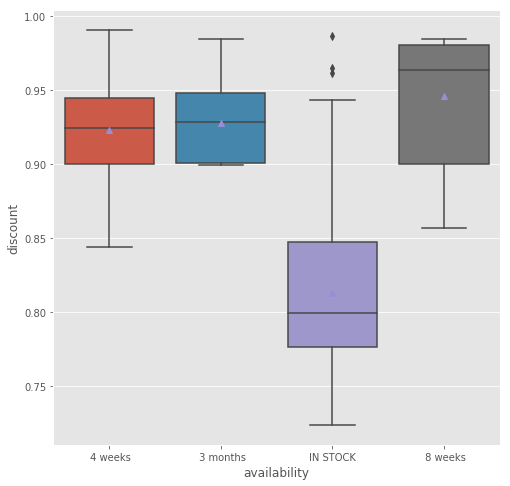

In [598]:
sns.boxplot(x="availability",y="discount",data=boxdata,showmeans=True)
plt.rcParams["figure.figsize"]=8,8

In [581]:
#anova
import statsmodels.api as sm
from statsmodels.formula.api import ols

 
mod = ols('discount ~ availability',
                data=boxdata).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                sum_sq      df           F  PR(>F)
availability  1.135090  3.0     721.894932  0.0   
Residual      1.427193  2723.0 NaN         NaN    


In [582]:
#tukey-test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(boxdata['discount'], boxdata['availability'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1   group2  meandiff  lower   upper  reject
--------------------------------------------------
 3 months  4 weeks -0.0042  -0.0087  0.0004 False 
 3 months  8 weeks  0.0183   0.0094  0.0271  True 
 3 months IN STOCK -0.1148  -0.1224 -0.1073  True 
  4 weeks  8 weeks  0.0224   0.0147  0.0302  True 
  4 weeks IN STOCK -0.1107  -0.1169 -0.1044  True 
  8 weeks IN STOCK -0.1331  -0.1429 -0.1233  True 
--------------------------------------------------
[' 3 months' ' 4 weeks' ' 8 weeks' 'IN STOCK']


### Tukey test: only 3 months vs 4 weeks discount are not significant

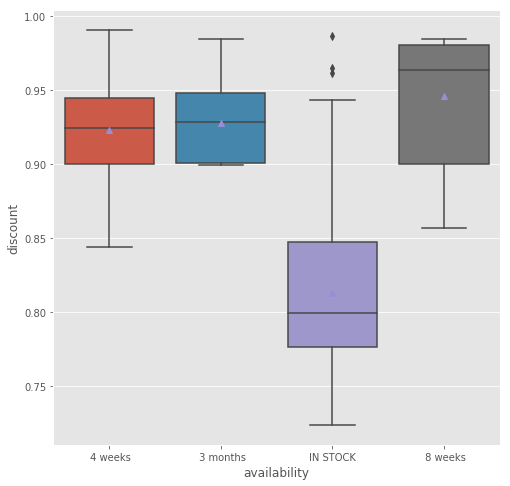

In [589]:
sns.boxplot(x="availability",y="discount",data=boxdata,showmeans=True)
plt.rcParams["figure.figsize"]=8,8

### In-stock watches are also significantly cheaper!

- The longer the wait the more expensive is the watch in general
- 3 months have more expensive watches when looking at the gap between mean and median
- 4 weeks and 8 weeks mean prices are on the same level

(0, 130000)

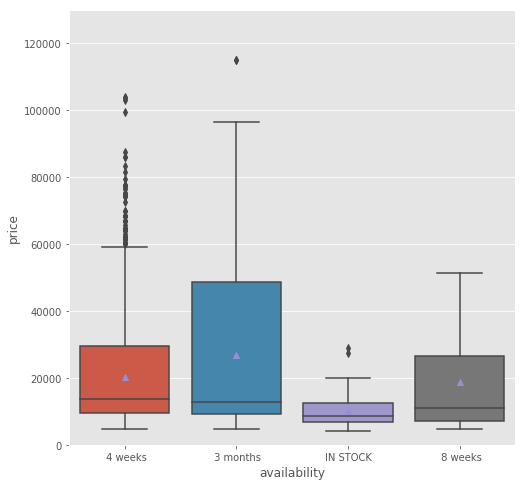

In [603]:
sns.boxplot(x="availability",y="price",data=boxdata,showmeans=True)
plt.rcParams["figure.figsize"]=8,8
plt.ylim(0, 130000) #hide the outlier watch

In [602]:
#tukey-test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(boxdata['price'], boxdata['availability'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

      Multiple Comparison of Means - Tukey HSD,FWER=0.05     
  group1   group2    meandiff     lower       upper    reject
-------------------------------------------------------------
 3 months  4 weeks  -6611.7409  -9786.3966  -3437.0852  True 
 3 months  8 weeks  -8173.1432  -14312.215  -2034.0714  True 
 3 months IN STOCK -16857.0213 -22104.4013 -11609.6412  True 
  4 weeks  8 weeks  -1561.4023  -6946.7576  3823.9529  False 
  4 weeks IN STOCK -10245.2804 -14586.8061  -5903.7547  True 
  8 weeks IN STOCK  -8683.878  -15499.9333  -1867.8228  True 
-------------------------------------------------------------
[' 3 months' ' 4 weeks' ' 8 weeks' 'IN STOCK']


In [73]:
merged.condition.value_counts()

New - Never Worn       2649
Store Display Model    99  
Name: condition, dtype: int64

### Store display models aren't necessarily cheaper than new watches

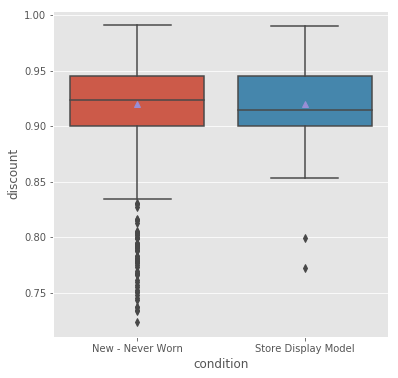

In [124]:
sns.boxplot(x="condition",y="discount",data=merged, showmeans=True)

### Categories with top 10 most products have higher discount mean (less discount) than categories not in top 10

In [197]:
group = merged.groupby('product')

In [343]:
test=group.size().sort_values(ascending=False)[:10]
test

product
Rolex Datejust 36 116203         71
Rolex Datejust 36 116233         70
Rolex Lady-Datejust 26 179173    69
Rolex Datejust 36 116234         67
Rolex Lady-Datejust 26 179163    64
Rolex Day-Date 36 118238         52
Rolex Datejust 36 116200         51
Rolex Day-Date 36 118208         49
Rolex Lady-Datejust 26 179174    48
Rolex Datejust 31 178384         46
dtype: int64

In [251]:
top10_product=merged[merged["product"].isin(["Rolex Datejust 36 116203","Rolex Datejust 36 116233","Rolex Lady-Datejust 26 179173","Rolex Datejust 36 116234 ","Rolex Lady-Datejust 26 179163",
                              "Rolex Day-Date 36 118238","Rolex Datejust 36 116200","Rolex Day-Date 36 118208","Rolex Lady-Datejust 26 179174",
                              "Rolex Datejust 31 178384"])]

In [264]:
not_top10_product=merged[~merged["product"].isin(top10_product["product"])]

In [361]:
top10_product["discount"]

,availability,condition,image,item_number,price,product,retail_price,warranty,discount
684,IN STOCK,New - Never Worn,https://s.yimg.com/aah/movadobaby/rolex-oyster-perpetual-datejust-116203-2538.jpg,116203-STLRJ,8575.0,Rolex Datejust 36 116203,10800.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)",0.793981
685,IN STOCK,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-datejust-lady-31-178384-1579.jpg,178384-SLVDO,11995.0,Rolex Datejust 31 178384,15850.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)",0.756782
687,IN STOCK,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-lady-datejust-steel-179174-1558.jpg,179174-SLVJDO,7175.0,Rolex Lady-Datejust 26 179174,9100.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+50), Gold:Lifetime $295 Best Value(+150),Platinum:Lifetime w/Ultrasonic $395 Sale(+225)",0.788462
702,IN STOCK,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-lady-datejust-steel-gold-179163-1619.jpg,179163-MOPRO,7595.0,Rolex Lady-Datejust 26 179163,9550.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+50), Gold:Lifetime $295 Best Value(+150),Platinum:Lifetime w/Ultrasonic $395 Sale(+225)",0.795288
705,IN STOCK,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-lady-datejust-steel-gold-179173-2400.jpg,179173-WHTRO,6495.0,Rolex Lady-Datejust 26 179173,8200.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+50), Gold:Lifetime $295 Best Value(+150),Platinum:Lifetime w/Ultrasonic $395 Sale(+225)",0.792073
727,IN STOCK,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-oyster-perpetual-datejust-116233-2196.jpg,116233-SLVJDJ,10495.0,Rolex Datejust 36 116233,12850.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)",0.816732
755,Usually ships within 4 weeks,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-day-date-36-118238-blkdo-15.jpg,118238-BLKDO,29475.0,Rolex Day-Date 36 118238,32750.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)",0.900000
779,Usually ships within 4 weeks,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-day-date-36-118238-slvso-15.jpg,118238-SLVSO,28215.0,Rolex Day-Date 36 118238,31350.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)",0.900000
780,Usually ships within 4 weeks,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-day-date-36-118238-blsdo-15.jpg,118238-BLSDO,29475.0,Rolex Day-Date 36 118238,32750.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)",0.900000
781,Usually ships within 4 weeks,New - Never Worn,https://sep.yimg.com/ay/movadobaby/rolex-day-date-36-118238-bmpdo-15.jpg,118238-BMPDO,31095.0,Rolex Day-Date 36 118238,34550.0,"6 Years (Included),Silver: + 3 Years $95 Sale(+75), Gold:Lifetime $295 Sale(+245),Platinum:Lifetime w/Ultrasonic $395 Sale(+295)",0.900000


In [267]:
not_top10_product["discount"]

0       0.900000
1       0.928571
2       0.952245
3       0.946617
4       0.853604
5       0.945545
6       0.945545
7       0.945545
8       0.900000
9       0.900000
10      0.950980
11      0.950610
12      0.900000
13      0.900000
14      0.900000
15      0.900000
16      0.900000
17      0.900000
18      0.900000
19      0.900000
20      0.900000
21      0.917710
22      0.900000
23      0.900192
24      0.900192
25      0.900192
26      0.900000
27      0.900000
28      0.943787
29      0.919753
          ...   
2594    0.919505
2595    0.929577
2596    0.919571
2597    0.919571
2598    0.915916
2599    0.914966
2600    0.915916
2601    0.933054
2602    0.933628
2603    0.949198
2604    0.949198
2605    0.933628
2606    0.933054
2607    0.949198
2608    0.933921
2609    0.932243
2610    0.933921
2611    0.932243
2612    0.945714
2613    0.945714
2614    0.929134
2615    0.945714
2616    0.945714
2617    0.945714
2618    0.949198
2619    0.932243
2682    0.869186
2744    0.8017

In [298]:
product_comparison=top10_product.join(not_top10_product,how="outer",lsuffix="top",rsuffix="not")
product_discount_comparison=product_comparison[["discounttop","discountnot"]]
#product_comparison.columns

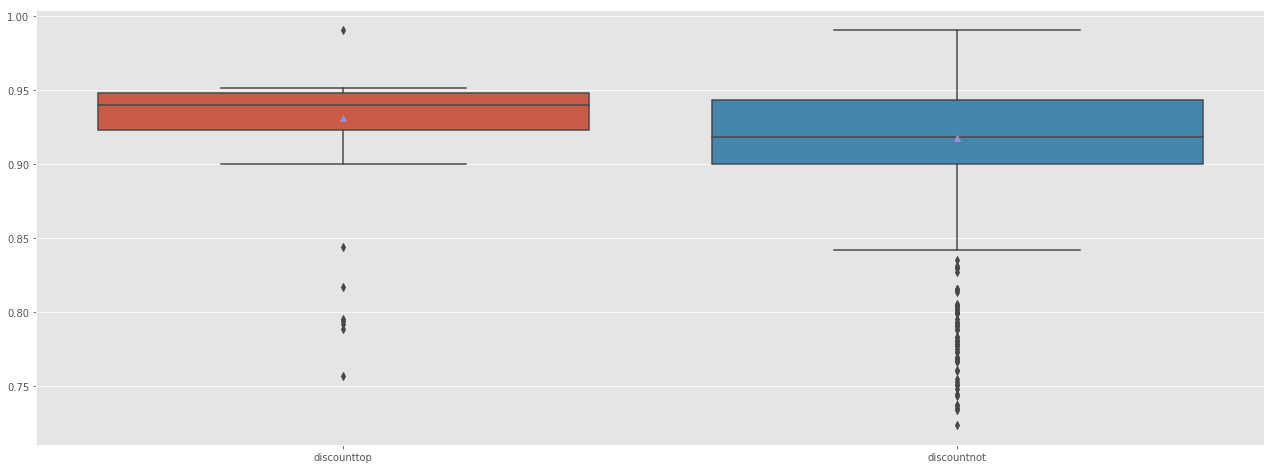

In [299]:
sns.boxplot(data=product_discount_comparison, showmeans=True)
plt.rcParams["figure.figsize"]=22,8

In [305]:
#anova
import scipy.stats as stats
test1=product_discount_comparison["discounttop"].dropna(axis=0, how='all')
test2=product_discount_comparison["discountnot"].dropna(axis=0, how='all')
stats.f_oneway(test1,test2)

F_onewayResult(statistic=86.95127048990801, pvalue=2.216756676868603e-20)

In [309]:
test1.mean() #0.931554817304968
test2.mean() #0.9178080197164554

0.9178080197164554

### Lost profit margin: Rolex AD loses at least  $1,500 for every watch being sold online

In [99]:
#assume most of the profits being sold are within 2 standard deviation of the retail price
#watches expensive than that are probably being bought in-store
lpm=merged[merged.retail_price.map(lambda x: np.abs(x - merged.retail_price.mean()) / merged.retail_price.std() < 2)]
(1-lpm.discount.mean())* lpm.retail_price.mean()

1571.1743539827735

## Conclusion

- Branding: Rolex upholds its branding as a luxury watch rather well 
- Distribution: consumers have reason to shop at boutique store or AD than to shop online
- Margin: Rolex loses very litte profit margin
